<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/onda_cuadrada_filtrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtrado de una onda cuadrada

En clase mediremos la salida a un circuito pasabajos RC al entrar con una onda cuadrada de 1 kHz. En este notebook analizaremos esa salida matemáticamente descomponiendo la entrada como serie de Fourier.

Para empezar generamos una onda cuadrada en python.

 



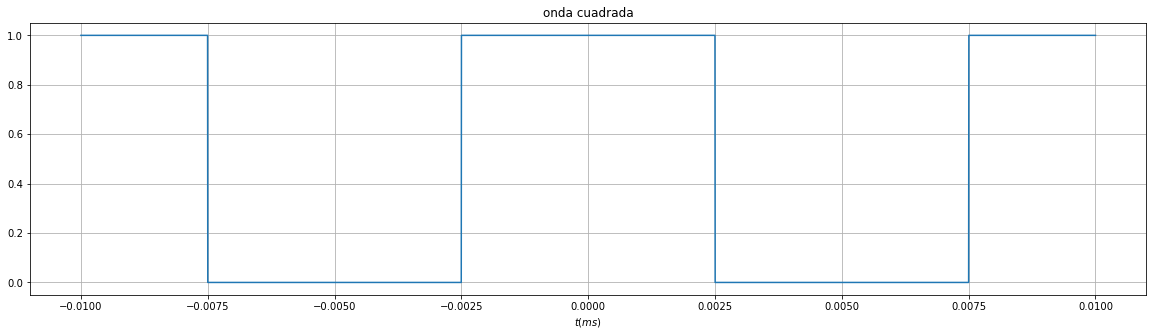

In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

t = np.linspace(-.01, .01, 5000)
T = 0.01

x = signal.square((t + 0.25 * T) * 2 * np.pi / T, 0.5) / 2 + 1 / 2

plt.figure(figsize=(20, 5))
plt.plot(t, x)
plt.title('onda cuadrada')
plt.xlabel(r'$t(ms)$')
plt.show
plt.grid()

Salvo en los puntos de discontinuidad, esta onda cuadrada de período $T=1 ms$ puede descomponerse como

$$x(t)=\sum_{k \in \mathbb Z} a_k e^{j2\pi t/T} =\sum_{k \in \mathbb Z} a_k e^{j2\pi t/0.001}=\sum_{k \in \mathbb Z} a_k e^{j2000\pi t}$$

con $a_0=1/2$ pues esa es su media o componente DC, y para $k\neq 0$ 

$$a_k=\frac{\sin(\pi k)}{\pi k}$$

lo cual comprobamos a continuación.

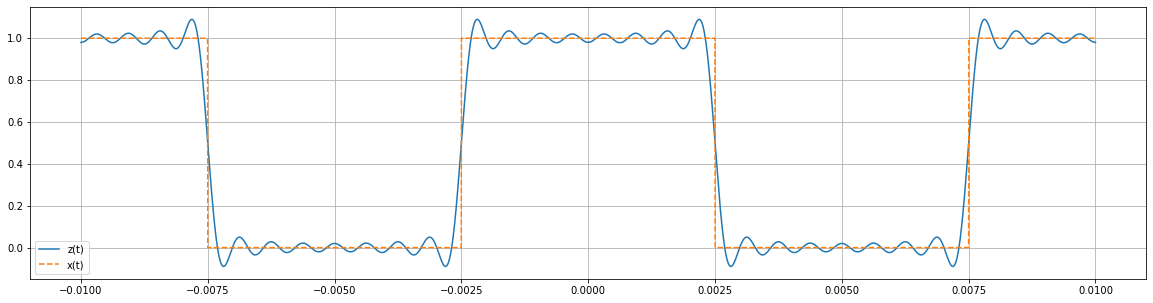

In [9]:
K = 15
a0 = 1 / 2
z = a0
for k in range(1, K + 1):
    a_k = np.sin(np.pi * k / 2) / (k * np.pi)
    z = z + a_k * np.exp(1j * 2 * np.pi * k * t / T)
    z = z + a_k * np.exp(-1j * 2 * np.pi * k * t / T)
    
plt.figure(figsize=(20, 5))
plt.plot(t, np.real(z), label='z(t)')
plt.plot(t, x, '--', label='x(t)')
plt.legend()
plt.grid()

Luego cada exponencial $e^{j 2 k\pi t/T}$ al pasar por el filtro RC queda multiplicada por su transferencia 

$$H(s)=\frac{1}{RC}\frac{1}{s+\frac{1}{RC}}$$

evaluada en $$jk \omega_0 = 2j\pi k t/T$$

es decir 

$$H_k:= H(jk 2\pi/T)=\frac{1}{RC} \left(\frac{1}{\frac{j k2\pi}{T} +\frac{1}{RC}}\right)$$

Entonces por linealidad la salida es

$$y(t)=\sum_{k \in \mathbb Z} a_k H_k e^{j2\pi t/T}=\sum_{k \in \mathbb Z} b_k  e^{j2\pi t/T}$$

con $b_0=1/2$ pues la transferencia DC es $H_0=1$,  y para $k\neq 0$

$$b_k=H_k a_k= \frac{1}{RC} \left(\frac{1}{\frac{j k2\pi}{T} +\frac{1}{RC}}\right) \sin(\pi k)/\pi k$$

lo cual graficado queda de la siguiente manera



0.0012


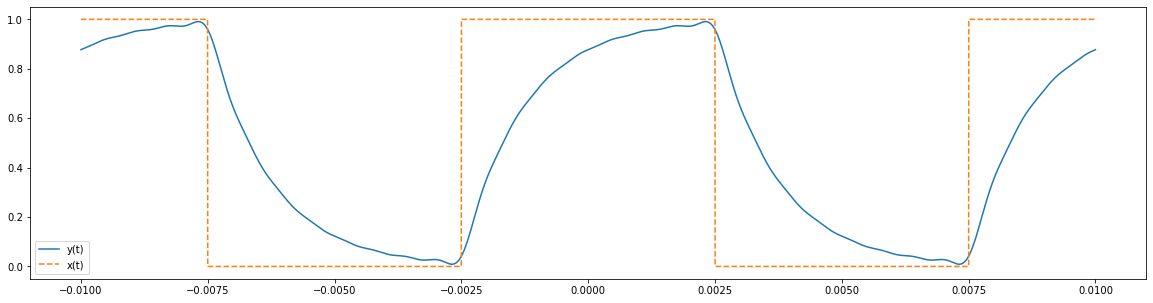

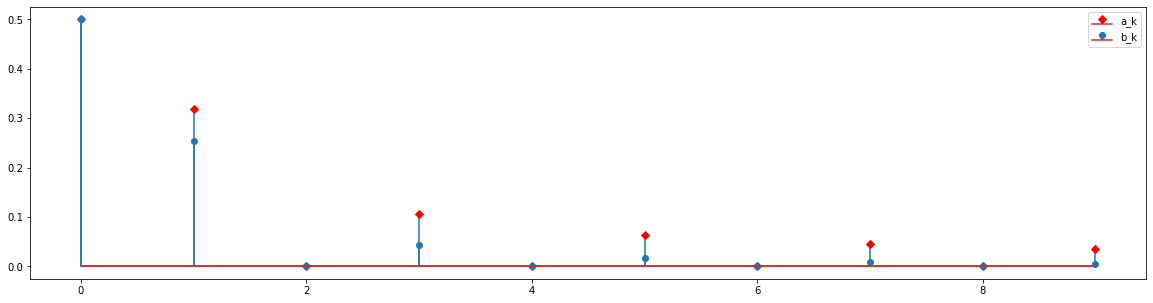

In [10]:
y = 1 / 2
R = 12000
C = .0000001
tau = R * C
print(tau)
ks = range(0, K + 1)
aes = [1 / 2] * (K + 1)
bs = [1 / 2] * (K + 1)
for k in range(1, K + 1):
    a_k = np.sin(np.pi * k / 2) / (k * np.pi)
    H_k = 1 / (R * C) * 1 / (1j * k * 2 * np.pi / T + 1 / (R * C))
    b_k = a_k * H_k
    kneg = -k
    a_kneg = np.sin(np.pi * kneg / 2) / (kneg * np.pi)
    H_kneg = 1 / (R * C) * 1 / (1j * kneg * 2 * np.pi / T + 1 / (R * C))
    b_kneg = a_kneg * H_kneg
    aes[k] = np.abs(a_k)
    bs[k] = np.abs(b_k)

    y = y + b_k * np.exp(1j * 2 * np.pi * k * t / T)
    y = y + b_kneg * np.exp(1j * 2 * np.pi * kneg * t / T)
    
plt.figure(figsize=(20, 5))
plt.plot(t, np.real(y), label='y(t)')
plt.plot(t, x, '--', label='x(t)')
plt.legend()
plt.grid()
plt.figure(figsize=(20, 5))
plt.stem(ks[:10], aes[:10], markerfmt='rD', label='a_k')
plt.stem(ks[:10], bs[:10], label='b_k')
plt.legend()
plt.grid()

Se puede observar el ejecto pasabajos del filtro RC, en que las componentes de alta frecuancia son atenuadas. Esa atenuación se evidencia si comparamos la amplitud de los coeficientes $a_k$ de la entrada $x(t)$ y $b_k$ de la salida $y(t)$ en la figura anterior